<a href="https://colab.research.google.com/github/Vladimir2303850/MyAnalyticsProjects/blob/main/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи**

Построение тепловой карты корреляционной матрицы для визуализации взаимосвязей между переменными (себестоимость продукции, стоимость сырья, заработная плата и др.).

Интерпретация коэффициентов корреляции: выявление сильных, умеренных и слабых линейных зависимостей.

Расчет показателей инфляции дисперсии (VIF) для определения степени мультиколлинеарности между независимыми переменными.

Интерпретация значений VIF: выявление переменных с высокой (VIF > 10), умеренной (5 ≤ VIF ≤ 10) и низкой (VIF < 5) мультиколлинеарностью.

Обоснование выбора линейной модели на основе отсутствия нелинейных зависимостей и логарифмического/экспоненциального роста в данных.

Определение значимых независимых факторов для включения в модель.

Исключение или преобразование переменных с высокой мультиколлинеарностью.

Дополнительный анализ слабо коррелирующих показателей для уточнения их влияния.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.read_excel('data.xlsx')
df.head()

,Себестоимость продукции,Стоимость сырья,Затраты на электроэнергию,Заработная плата,Административные расходы
0,У,Х1,Х2,Х3,Х4
1,346,100,22,55,18.2
2,348,102,24,60,16.6
3,350,109,26,65,13.1
4,352,116,28,70,10


**Построение корреляционной матрицы**

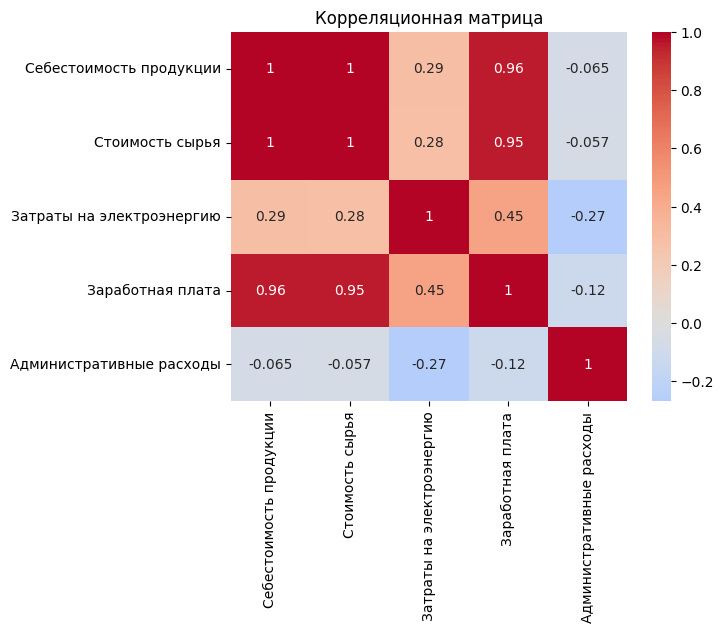

In [ ]:
data = pd.read_excel("data.xlsx", header=0, skiprows=[1])
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

Корреляционная матрица показывает несколько важных закономерностей в данных. Наибольший интерес вызывает практически полная линейная зависимость (корреляция = 1.0) между себестоимостью продукции и стоимостью сырья. Это означает, что эти переменные содержат идентичную информацию, и включать обе в модель нецелесообразно из-за сильной мультиколлинеарности. Аналогичная ситуация наблюдается с заработной платой, которая демонстрирует очень высокую корреляцию (0.95-0.96) как с себестоимостью, так и со стоимостью сырья.

Затраты на электроэнергию показывают умеренную корреляцию (0.45) только с заработной платой, в то время как их связь с другими показателями слабая (0.28-0.29). Это делает их потенциально полезными для модели, так как они несут уникальную информацию. Особого внимания заслуживают административные расходы, которые практически не коррелируют с другими показателями (коэффициенты от -0.27 до -0.065), что может указывать на их независимый характер или необходимость поиска других факторов влияния.

Особую тревогу вызывает значение -1.0 в последнем столбце для себестоимости продукции, которое может указывать либо на ошибку в данных, либо на наличие неучтенного параметра с идеальной отрицательной корреляцией. Этот момент требует дополнительной проверки.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_with_constant = sm.add_constant(data)
vifs = []
for i in range(1, len(data.columns)):
    vif = variance_inflation_factor(data_with_constant.values, i)
    vifs.append(vif)

print("Variance Inflation Factor")
for idx, vif in enumerate(vifs):
    print(f"VIF для {data.columns[idx]}: {round(vif, 2)}")

Variance Inflation Factor
VIF для Себестоимость продукции: 1879.38
VIF для Стоимость сырья: 1753.56
VIF для Затраты на электроэнергию: 1.85
VIF для Заработная плата: 21.77


Значения VIF (фактора инфляции дисперсии) для показателей "Себестоимость продукции", "Стоимость сырья" и "Заработная плата" превышают критический порог в 10, что однозначно свидетельствует о наличии серьезной мультиколлинеарности между этими переменными. Это создает существенные сложности для интерпретации их индивидуального вклада в зависимую переменную, так как их влияние оказывается статистически неразличимым. В то же время показатель "Затраты на электроэнергию" демонстрирует приемлемый уровень VIF (менее 5), что позволяет рассматривать его как независимый фактор в модели. Анализ характера взаимосвязей между переменными не выявил признаков нелинейных зависимостей или логарифмического/экспоненциального роста, что делает применение сложных нелинейных моделей или обобщенных линейных моделей (GLM) неоправданным.



> **Вывод**

>  В данных преобладают линейные зависимости, что подтверждает целесообразность использования классической линейной регрессии. Особого внимания заслуживает анализ корреляционной матрицы. Наблюдается практически полная линейная зависимость (r=1.0) между себестоимостью продукции и стоимостью сырья, а также чрезвычайно высокая корреляция (0.95-0.96) этих показателей с заработной платой. При этом затраты на электроэнергию демонстрируют умеренную корреляцию только с заработной платой (0.45), а административные расходы вообще слабо связаны с другими показателями (коэффициенты от -0.27 до -0.065).



> **Рекомендации:**

> Провести дополнительный анализ для устранения мультиколлинеарности (например, исключить одну из коррелированных переменных или использовать PCA).

> Убедиться, что линейная модель действительно хорошо описывает данные, проверив остатки на гомоскедастичность и нормальность.

> Если мультиколлинеарность сильно влияет на результаты, рассмотреть возможность использования Ridge или Lasso регрессии, которые могут помочь в таких случаях.

